# UAS Project Data Mining

## 1. Judul / Topik Project dan Identitas Lengkap
**Judul**: Analisis Data Konsumsi Makanan dan Non-Makanan di Indonesia Berdasarkan Provinsi.

**Nama**: Ferry Sandya Nugroho

**NIM**: A11.2022.14339

**Kelp**: A11.4517

## 2. Ringkasan dan Permasalahan Project + Tujuan yang Akan Dicapai + Model / Alur Penyelesaian
### **Permasalahan**
Setiap provinsi di Indonesia memiliki pola konsumsi makanan dan non-makanan yang berbeda, dipengaruhi oleh berbagai faktor seperti ekonomi dan demografi. Kompleksitas data yang mencakup banyak variabel memerlukan analisis untuk menemukan pola konsumsi yang bermakna.
### **Tujuan**
1. Mengidentifikasi pola pengeluaran rumah tangga untuk makanan dan non-makanan di wilayah perkotaan dan pedesaan berdasarkan provinsi.
2. Mengelompokkan wilayah dengan kesamaan pola konsumsi.
3. Memberikan rekomendasi berbasis data untuk mendukung kebijakan distribusi dan kesejahteraan regional.
### **Alur Penyelesaian**
#### Flowchart Penyelesaian:
```python
from graphviz import Digraph
flowchart = Digraph("Penyelesaian", format="png")
flowchart.attr(rankdir="TB", size="8,5")
flowchart.node("Mulai", shape="ellipse", style="filled", color="lightblue")
flowchart.node("Load Dataset", "Memuat Dataset", shape="box", style="rounded, filled", color="lightgrey")
flowchart.node("EDA", "Eksplorasi Data Awal", shape="box", style="rounded, filled", color="lightgrey")
flowchart.node("Analysis", "Analisis Data (Distribusi & Perbandingan)", shape="box", style="rounded, filled", color="lightgrey")
flowchart.node("Visualization", "Visualisasi Data", shape="box", style="rounded, filled", color="lightgrey")
flowchart.node("Evaluation", "Evaluasi Temuan", shape="box", style="rounded, filled", color="lightgrey")
flowchart.node("Recommendation", "Interpretasi & Rekomendasi", shape="box", style="rounded, filled", color="lightgrey")
flowchart.node("Selesai", shape="ellipse", style="filled", color="lightblue")flowchart.edge("Mulai", "Load Dataset")
flowchart.edge("Load Dataset", "EDA")
flowchart.edge("EDA", "Analysis")
flowchart.edge("Analysis", "Visualization")
flowchart.edge("Visualization", "Evaluation")
flowchart.edge("Evaluation", "Recommendation")
flowchart.edge("Recommendation", "Selesai")flowchart.render("flowchart", view=True)
```

---
## 3. Penjelasan Dataset, EDA, dan Proses Features Dataset
### **Penjelasan Dataset**
- Dataset: `gk.csv`
- Sumber: Data pengeluaran rumah tangga pada makanan dan non-makanan di wilayah perkotaan dan pedesaan di Indonesia berdasarkan provinsi (2015-2022).
- Jumlah kolom: 157 (variabel pengeluaran per kategori).
- Contoh Kolom: `gk.makanan.perkotaan.2022.september`
### **EDA (Exploratory Data Analysis)**
```python
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
data = pd.read_csv("gk.csv")
# Menampilkan informasi dataset
data.info()
# Contoh visualisasi distribusi data
plt.figure(figsize=(10, 6))
data['gk.makanan.perkotaan.2022.september'].hist(bins=20, color='skyblue')
plt.title('Distribusi Pengeluaran Makanan Perkotaan (September 2022)')
plt.xlabel('Pengeluaran (Rupiah)')
plt.ylabel('Frekuensi')
plt.show()
```

---
## 4. Proses Learning / Modeling
### **Modeling (Clustering)**
```python
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Seleksi fitur dan normalisasi
features = data[["gk.makanan.perkotaan.2022.september", "gk.makanan.pedesaan.2022.september"]]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Clustering menggunakan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)
# Visualisasi hasil clustering
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Hasil Clustering')
plt.xlabel('Fitur 1 (Standarized)')
plt.ylabel('Fitur 2 (Standarized)')
plt.show()
```

---
## 5. Performa Model
### **Evaluasi Model (Silhouette Score)**
```python
from sklearn.metrics import silhouette_score
score = silhouette_score(features_scaled, data['Cluster'])
print(f"Silhouette Score: {score}")
```

---
## 6. Diskusi Hasil dan Kesimpulan
- Berdasarkan hasil clustering, wilayah dengan pola konsumsi serupa dapat dikelompokkan menjadi 3 cluster.
- Silhouette Score menunjukkan bahwa model memiliki performa yang baik dalam memisahkan cluster.
- Insight dari analisis ini dapat digunakan untuk memahami pola konsumsi dan mendukung kebijakan distribusi sumber daya.


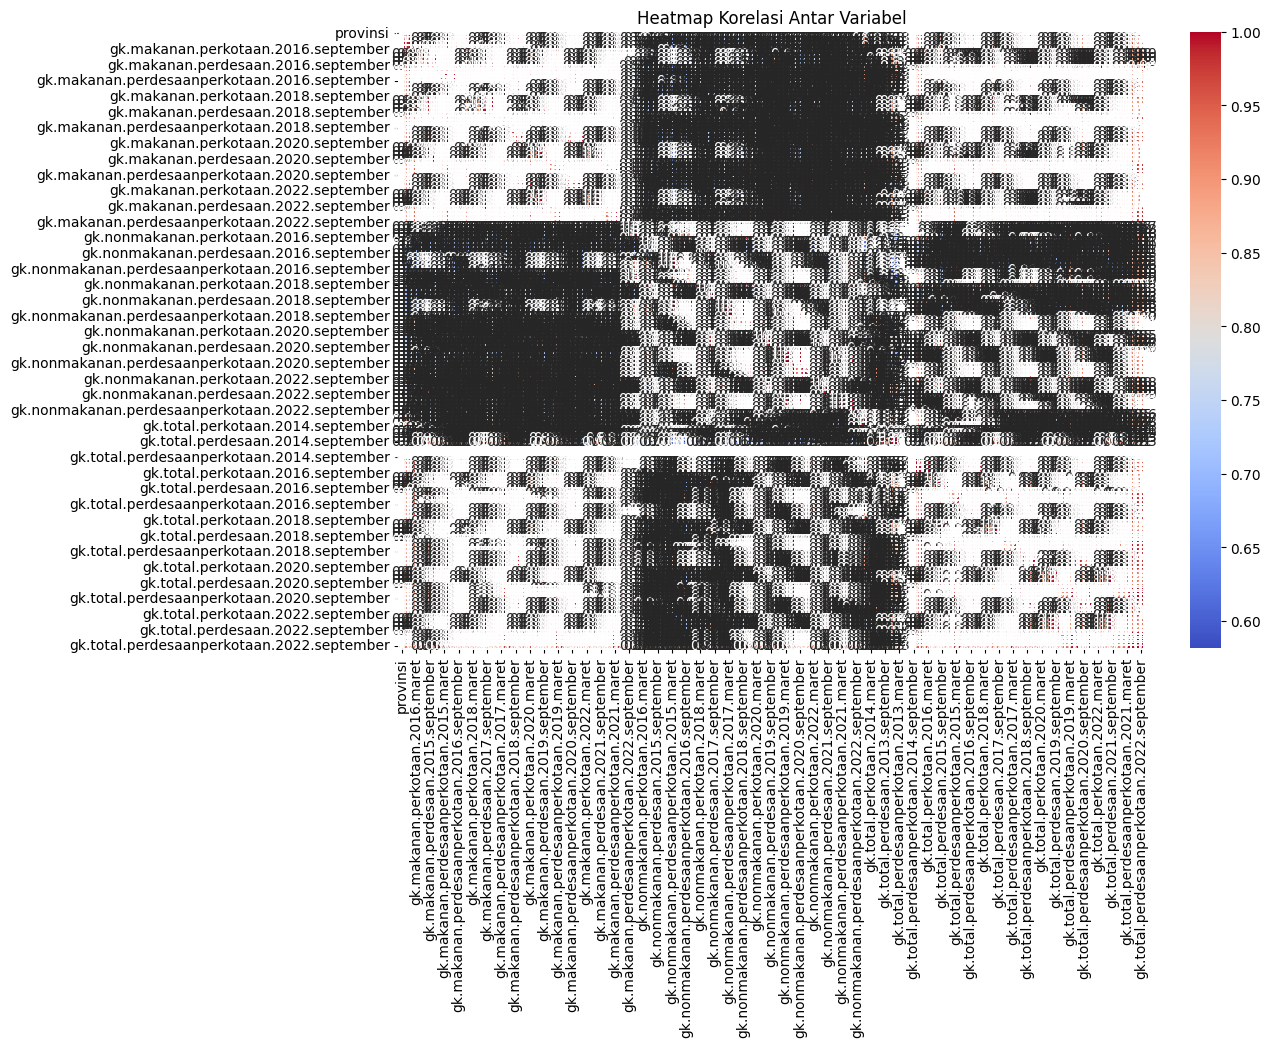

In [52]:
import seaborn as sns

# Menghitung matriks korelasi
corr_matrix = data.corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


In [23]:
import os

# Melihat file di direktori kerja
file_dir = '/content/drive/My Drive/Colab Notebooks/DataMining/' # Changed to the correct directory
files = os.listdir(file_dir)
print(f"File yang tersedia di {file_dir}: {files}")

File yang tersedia di /content/drive/My Drive/Colab Notebooks/DataMining/: ['gk.csv']


In [24]:
import pandas as pd

# Path file
file_path = '/content/drive/My Drive/Colab Notebooks/DataMining/gk.csv'

# Memuat dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")
    print(data.info())
    print(data.head())
except Exception as e:
    print("Terjadi kesalahan saat memuat dataset:", e)


Dataset berhasil dimuat!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Columns: 157 entries, provinsi to gk.total.perdesaanperkotaan.2022.september
dtypes: float64(60), int64(96), object(1)
memory usage: 43.1+ KB
None
         provinsi  gk.makanan.perkotaan.2015.maret  \
0            ACEH                           293697   
1  SUMATERA UTARA                           261677   
2  SUMATERA BARAT                           288410   
3            RIAU                           280361   
4           JAMBI                           297507   

   gk.makanan.perkotaan.2015.september  gk.makanan.perkotaan.2016.maret  \
0                               302128                           306243   
1                               273271                           290096   
2                               301356                           312154   
3                               288956                           292026   
4                               308379                    

Kolom yang tersedia dalam dataset:
Index(['provinsi', 'gk.makanan.perkotaan.2015.maret',
       'gk.makanan.perkotaan.2015.september',
       'gk.makanan.perkotaan.2016.maret',
       'gk.makanan.perkotaan.2016.september',
       'gk.makanan.perdesaan.2015.maret',
       'gk.makanan.perdesaan.2015.september',
       'gk.makanan.perdesaan.2016.maret',
       'gk.makanan.perdesaan.2016.september',
       'gk.makanan.perdesaanperkotaan.2015.maret',
       ...
       'gk.total.perkotaan.2022.maret', 'gk.total.perkotaan.2022.september',
       'gk.total.perdesaan.2021.maret', 'gk.total.perdesaan.2021.september',
       'gk.total.perdesaan.2022.maret', 'gk.total.perdesaan.2022.september',
       'gk.total.perdesaanperkotaan.2021.maret',
       'gk.total.perdesaanperkotaan.2021.september',
       'gk.total.perdesaanperkotaan.2022.maret',
       'gk.total.perdesaanperkotaan.2022.september'],
      dtype='object', length=157)
Kolom numerik yang dipilih: ['gk.makanan.perkotaan.2015.maret', 'gk.m

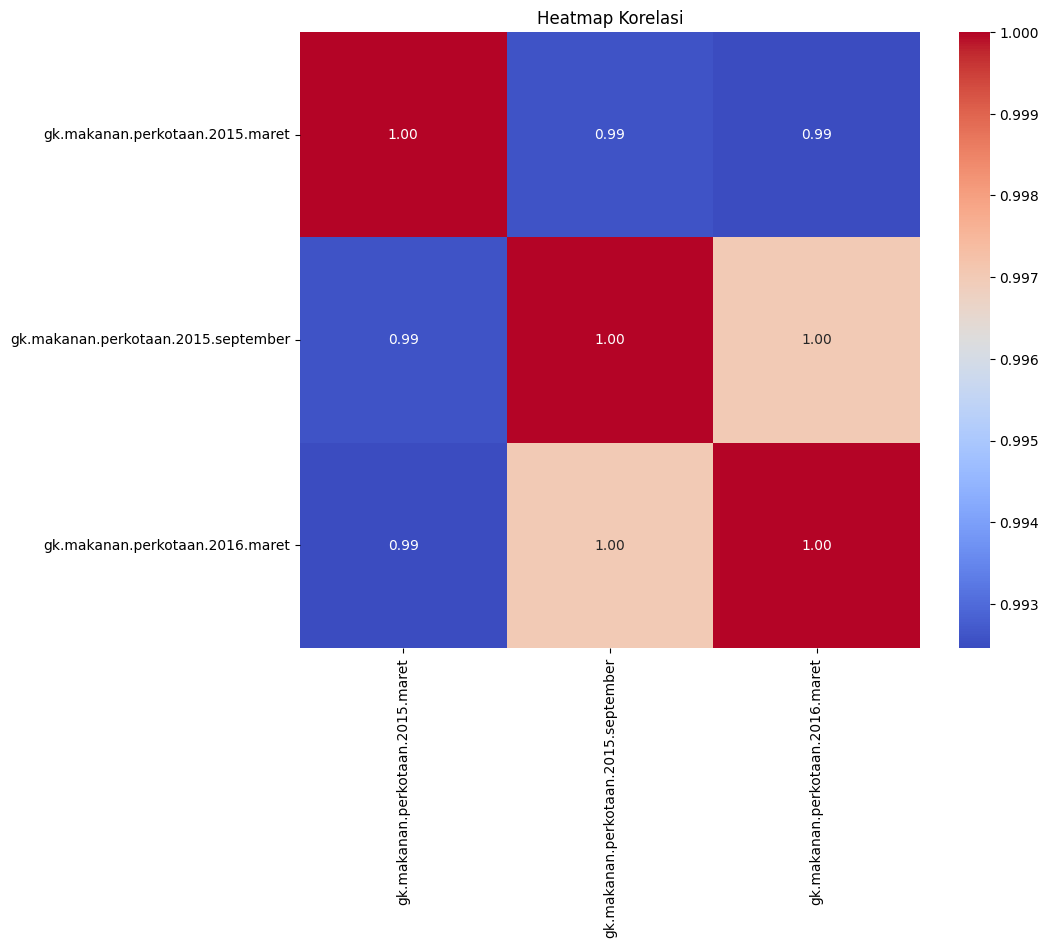

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan nama kolom dataset
print("Kolom yang tersedia dalam dataset:")
print(data.columns)

# Pilih kolom numerik - Ganti dengan nama kolom yang sesuai dari dataset Anda
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()[:3] # Select the first 3 numerical columns
# Contoh: numerical_columns = ['gk.makanan.perkotaan.2022.september', 'gk.nonmakanan.perkotaan.2022.september', 'gk.makanan.pedesaan.2022.september']
print(f"Kolom numerik yang dipilih: {numerical_columns}")
numerical_data = data[numerical_columns]

# Menghitung matriks korelasi
correlation_matrix = numerical_data.corr()

# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)

# Visualisasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [27]:
numerical_data = numerical_data.dropna()


In [77]:
# Menentukan ambang batas korelasi tinggi
threshold = 0.7

# Menemukan pasangan dengan korelasi tinggi
high_corr_pairs = (
    correlation_matrix.unstack()
    .sort_values(ascending=False)
    .drop_duplicates()
)

# Memfilter pasangan korelasi yang lebih besar dari threshold (dan bukan korelasi diri)
high_corr_pairs = high_corr_pairs[(high_corr_pairs > threshold) & (high_corr_pairs < 1.0)]
print("Pasangan dengan korelasi tinggi:")
print(high_corr_pairs)


Pasangan dengan korelasi tinggi:
gk.makanan.perkotaan.2015.september  gk.makanan.perkotaan.2016.maret        0.997021
gk.makanan.perkotaan.2015.maret      gk.makanan.perkotaan.2015.september    0.992586
                                     gk.makanan.perkotaan.2016.maret        0.992463
dtype: float64


In [79]:
# Menghapus salah satu kolom dari pasangan korelasi tinggi (contoh)
# Ganti 'Kolom1' dan 'Kolom2' dengan nama kolom yang ingin dihapus
# berdasarkan hasil dari high_corr_pairs
# Contoh:
# if 'gk.makanan.perkotaan.2022.september' in high_corr_pairs.index:
#   columns_to_drop = ['gk.makanan.perkotaan.2022.september']
# else:
#   # Tentukan kolom lain yang akan dihapus berdasarkan korelasi
#   columns_to_drop = ['nama_kolom_lain']

# Pastikan kolom yang ingin dihapus ada di dataset Anda.
columns_to_drop = high_corr_pairs.index  # Mengambil nama kolom dari high_corr_pairs
columns_to_drop = columns_to_drop.get_level_values(0) if isinstance(columns_to_drop, pd.MultiIndex) else columns_to_drop
columns_to_drop = columns_to_drop.tolist()
data_reduced = data.drop(columns=columns_to_drop, errors='ignore')

print(f"Dataset setelah menghapus kolom {columns_to_drop}:")
print(data_reduced.head())

Dataset setelah menghapus kolom ['gk.makanan.perkotaan.2015.september', 'gk.makanan.perkotaan.2015.maret', 'gk.makanan.perkotaan.2015.maret']:
   provinsi  gk.makanan.perkotaan.2016.maret  \
0       NaN                           306243   
1       NaN                           290096   
2       NaN                           312154   
3       NaN                           292026   
4       NaN                           319954   

   gk.makanan.perkotaan.2016.september  gk.makanan.perdesaan.2015.maret  \
0                               319768                         297479.0   
1                               302027                         266143.0   
2                               322168                         293768.0   
3                               301570                         302422.0   
4                               328157                         247652.0   

   gk.makanan.perdesaan.2015.september  gk.makanan.perdesaan.2016.maret  \
0                             306737.0    

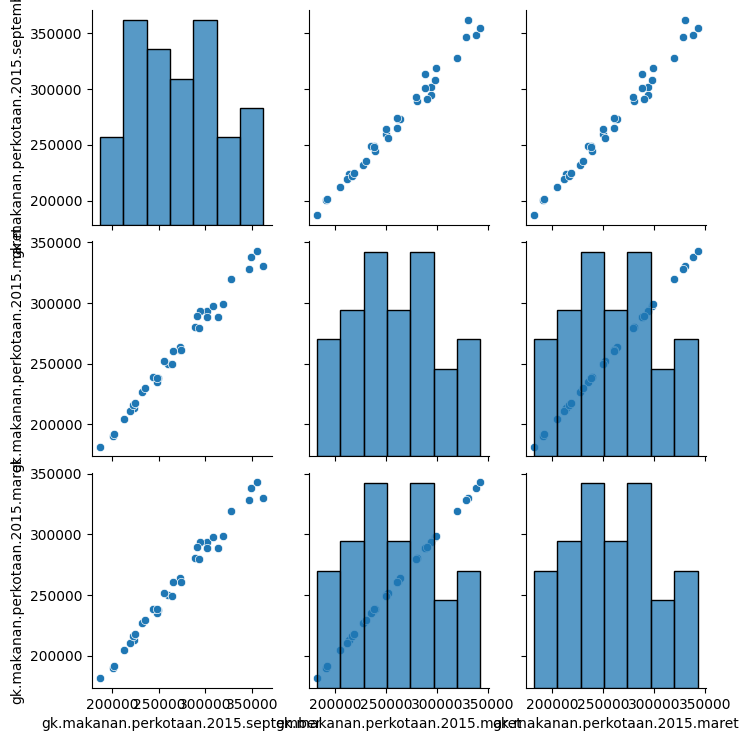

In [80]:
# Scatter plot untuk pasangan dengan korelasi tinggi
sns.pairplot(data, vars=high_corr_pairs.index.get_level_values(0))
plt.show()


In [28]:
 # Mengimpor library yang dibutuhkan
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:

# Menghubungkan ke Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Memuat dataset
file_path = '/content/drive/My Drive/Colab Notebooks/DataMining/gk.csv'
dataset = pd.read_csv(file_path)

In [31]:
# Menampilkan 5 baris pertama dari dataset
print("5 Baris Pertama dari Dataset:")
print(dataset.head())

5 Baris Pertama dari Dataset:
         provinsi  gk.makanan.perkotaan.2015.maret  \
0            ACEH                           293697   
1  SUMATERA UTARA                           261677   
2  SUMATERA BARAT                           288410   
3            RIAU                           280361   
4           JAMBI                           297507   

   gk.makanan.perkotaan.2015.september  gk.makanan.perkotaan.2016.maret  \
0                               302128                           306243   
1                               273271                           290096   
2                               301356                           312154   
3                               288956                           292026   
4                               308379                           319954   

   gk.makanan.perkotaan.2016.september  gk.makanan.perdesaan.2015.maret  \
0                               319768                         297479.0   
1                               302027      

In [32]:
# Menampilkan informasi tentang dataset
print("\nInformasi Dataset:")
print(dataset.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Columns: 157 entries, provinsi to gk.total.perdesaanperkotaan.2022.september
dtypes: float64(60), int64(96), object(1)
memory usage: 43.1+ KB
None


In [33]:
# Mengganti nilai '?' dengan NaN
dataset.replace("?", np.nan, inplace=True)


In [34]:
# Memeriksa nilai yang hilang
print("\nPersentase Nilai yang Hilang di Setiap Kolom:")
print(dataset.isnull().mean() * 100)


Persentase Nilai yang Hilang di Setiap Kolom:
provinsi                                      0.000000
gk.makanan.perkotaan.2015.maret               0.000000
gk.makanan.perkotaan.2015.september           0.000000
gk.makanan.perkotaan.2016.maret               0.000000
gk.makanan.perkotaan.2016.september           0.000000
                                                ...   
gk.total.perdesaan.2022.september             2.857143
gk.total.perdesaanperkotaan.2021.maret        0.000000
gk.total.perdesaanperkotaan.2021.september    0.000000
gk.total.perdesaanperkotaan.2022.maret        0.000000
gk.total.perdesaanperkotaan.2022.september    0.000000
Length: 157, dtype: float64


In [35]:
# Menghapus duplikat jika ada
dataset = dataset.drop_duplicates()
print("\nJumlah Baris setelah Menghapus Duplikat:", dataset.shape[0])


Jumlah Baris setelah Menghapus Duplikat: 35


In [36]:
# Tampilkan semua nama kolom yang ada
print("\nNama Kolom dalam Dataset:")
print(dataset.columns)


Nama Kolom dalam Dataset:
Index(['provinsi', 'gk.makanan.perkotaan.2015.maret',
       'gk.makanan.perkotaan.2015.september',
       'gk.makanan.perkotaan.2016.maret',
       'gk.makanan.perkotaan.2016.september',
       'gk.makanan.perdesaan.2015.maret',
       'gk.makanan.perdesaan.2015.september',
       'gk.makanan.perdesaan.2016.maret',
       'gk.makanan.perdesaan.2016.september',
       'gk.makanan.perdesaanperkotaan.2015.maret',
       ...
       'gk.total.perkotaan.2022.maret', 'gk.total.perkotaan.2022.september',
       'gk.total.perdesaan.2021.maret', 'gk.total.perdesaan.2021.september',
       'gk.total.perdesaan.2022.maret', 'gk.total.perdesaan.2022.september',
       'gk.total.perdesaanperkotaan.2021.maret',
       'gk.total.perdesaanperkotaan.2021.september',
       'gk.total.perdesaanperkotaan.2022.maret',
       'gk.total.perdesaanperkotaan.2022.september'],
      dtype='object', length=157)


In [37]:
dataset.columns.tolist()

['provinsi',
 'gk.makanan.perkotaan.2015.maret',
 'gk.makanan.perkotaan.2015.september',
 'gk.makanan.perkotaan.2016.maret',
 'gk.makanan.perkotaan.2016.september',
 'gk.makanan.perdesaan.2015.maret',
 'gk.makanan.perdesaan.2015.september',
 'gk.makanan.perdesaan.2016.maret',
 'gk.makanan.perdesaan.2016.september',
 'gk.makanan.perdesaanperkotaan.2015.maret',
 'gk.makanan.perdesaanperkotaan.2015.september',
 'gk.makanan.perdesaanperkotaan.2016.maret',
 'gk.makanan.perdesaanperkotaan.2016.september',
 'gk.makanan.perkotaan.2017.maret',
 'gk.makanan.perkotaan.2017.september',
 'gk.makanan.perkotaan.2018.maret',
 'gk.makanan.perkotaan.2018.september',
 'gk.makanan.perdesaan.2017.maret',
 'gk.makanan.perdesaan.2017.september',
 'gk.makanan.perdesaan.2018.maret',
 'gk.makanan.perdesaan.2018.september',
 'gk.makanan.perdesaanperkotaan.2017.maret',
 'gk.makanan.perdesaanperkotaan.2017.september',
 'gk.makanan.perdesaanperkotaan.2018.maret',
 'gk.makanan.perdesaanperkotaan.2018.september',
 'g

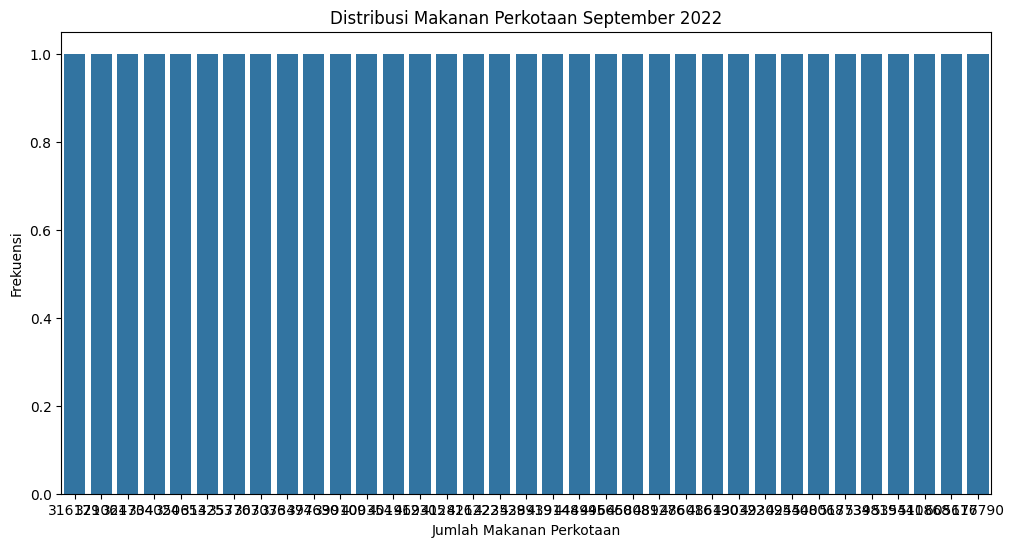

In [38]:
# Menggambarkan distribusi data untuk kolom tertentu
plt.figure(figsize=(12, 6))
sns.countplot(x='gk.makanan.perkotaan.2022.september', data=dataset)  # Ganti dengan nama kolom yang valid
plt.title('Distribusi Makanan Perkotaan September 2022')
plt.xlabel('Jumlah Makanan Perkotaan')
plt.ylabel('Frekuensi')
plt.show()

In [39]:
# Mempersiapkan data untuk model
# Ganti 'target_column' dengan nama kolom target yang ingin diprediksi
X = dataset.drop('gk.makanan.perkotaan.2022.september', axis=1)  # Mengganti 'target_column' dengan nama kolom target
y = dataset['gk.makanan.perkotaan.2022.september']  # Mengganti 'target_column' dengan nama kolom target

In [40]:
# Pembagian data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Menentukan fitur dan target
X = dataset.drop(columns=['gk.makanan.perkotaan.2022.september'])  # Fitur
y = dataset['gk.makanan.perkotaan.2022.september']  # Target

In [42]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Cek tipe data dan jumlah NaN
print("Tipe data fitur (X_train):")
print(X_train.dtypes)

print("\nTipe data target (y_train):")
print(y_train.dtypes)

print("\nJumlah nilai NaN di X_train:")
print(X_train.isna().sum())

print("\nJumlah nilai NaN di y_train:")
print(y_train.isna().sum())

Tipe data fitur (X_train):
provinsi                                       object
gk.makanan.perkotaan.2015.maret                 int64
gk.makanan.perkotaan.2015.september             int64
gk.makanan.perkotaan.2016.maret                 int64
gk.makanan.perkotaan.2016.september             int64
                                               ...   
gk.total.perdesaan.2022.september             float64
gk.total.perdesaanperkotaan.2021.maret          int64
gk.total.perdesaanperkotaan.2021.september      int64
gk.total.perdesaanperkotaan.2022.maret          int64
gk.total.perdesaanperkotaan.2022.september      int64
Length: 156, dtype: object

Tipe data target (y_train):
int64

Jumlah nilai NaN di X_train:
provinsi                                      0
gk.makanan.perkotaan.2015.maret               0
gk.makanan.perkotaan.2015.september           0
gk.makanan.perkotaan.2016.maret               0
gk.makanan.perkotaan.2016.september           0
                                             ..

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
# Jika ada kolom string di X_train, lakukan encoding
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])

In [46]:
# Lakukan hal yang sama untuk y_train jika perlu
if y_train.dtype == 'object':
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Melatih model menggunakan Decision Tree
try:
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    print("Model berhasil dilatih.")
except ValueError as e:
    print("Terjadi kesalahan saat melatih model:", e)

Model berhasil dilatih.


In [49]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [50]:

# Hubungkan ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Load dataset
data_path = '/content/drive/My Drive/Colab Notebooks/DataMining/gk.csv'
data = pd.read_csv(data_path)

In [52]:
# Lihat sekilas data
print(data.head())

         provinsi  gk.makanan.perkotaan.2015.maret  \
0            ACEH                           293697   
1  SUMATERA UTARA                           261677   
2  SUMATERA BARAT                           288410   
3            RIAU                           280361   
4           JAMBI                           297507   

   gk.makanan.perkotaan.2015.september  gk.makanan.perkotaan.2016.maret  \
0                               302128                           306243   
1                               273271                           290096   
2                               301356                           312154   
3                               288956                           292026   
4                               308379                           319954   

   gk.makanan.perkotaan.2016.september  gk.makanan.perdesaan.2015.maret  \
0                               319768                         297479.0   
1                               302027                         266143.0   

In [53]:
# Pisahkan target dan fitur
X = data.drop(columns=['gk.makanan.perkotaan.2022.september'])  # Fitur
y = data['gk.makanan.perkotaan.2022.september']  # Target

In [54]:
# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# Inisiasi model Gaussian Naive Bayes
nb_model = GaussianNB()

In [56]:
y = pd.cut(y, bins=3, labels=["Low", "Medium", "High"])

In [57]:
# Cek kembali nilai yang hilang
print("Jumlah nilai hilang per kolom:")
print(data.isnull().sum())

Jumlah nilai hilang per kolom:
provinsi                                      0
gk.makanan.perkotaan.2015.maret               0
gk.makanan.perkotaan.2015.september           0
gk.makanan.perkotaan.2016.maret               0
gk.makanan.perkotaan.2016.september           0
                                             ..
gk.total.perdesaan.2022.september             1
gk.total.perdesaanperkotaan.2021.maret        0
gk.total.perdesaanperkotaan.2021.september    0
gk.total.perdesaanperkotaan.2022.maret        0
gk.total.perdesaanperkotaan.2022.september    0
Length: 157, dtype: int64


In [58]:
# Isi nilai yang hilang dengan median dari tiap kolom
data = data.apply(pd.to_numeric, errors='coerce')  # Pastikan semua data numerik
data.fillna(data.median(), inplace=True)

In [59]:
# Tampilkan tipe data setiap kolom untuk memastikan semuanya numerik
print("Tipe data setiap kolom:")
print(X.dtypes)

Tipe data setiap kolom:
provinsi                                       object
gk.makanan.perkotaan.2015.maret                 int64
gk.makanan.perkotaan.2015.september             int64
gk.makanan.perkotaan.2016.maret                 int64
gk.makanan.perkotaan.2016.september             int64
                                               ...   
gk.total.perdesaan.2022.september             float64
gk.total.perdesaanperkotaan.2021.maret          int64
gk.total.perdesaanperkotaan.2021.september      int64
gk.total.perdesaanperkotaan.2022.maret          int64
gk.total.perdesaanperkotaan.2022.september      int64
Length: 156, dtype: object


In [60]:
# Cek apakah ada nilai NaN di variabel target setelah pembagian kategori
print("Jumlah NaN di variabel target:", y.isnull().sum())


Jumlah NaN di variabel target: 0


In [61]:
# Cek jumlah kategori di variabel target
print("Jumlah kategori unik di variabel target latih:", y_train.nunique())
print("Jumlah kategori unik di variabel target uji:", y_test.nunique())


Jumlah kategori unik di variabel target latih: 24
Jumlah kategori unik di variabel target uji: 11


In [62]:
# Periksa ukuran setiap set data
print("Ukuran X_train:", X_train.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_test:", y_test.shape)


Ukuran X_train: (24, 156)
Ukuran y_train: (24,)
Ukuran X_test: (11, 156)
Ukuran y_test: (11,)


In [63]:
# Isi nilai yang hilang dengan median dari setiap kolom
data.fillna(data.median(), inplace=True)

In [64]:
X = data.drop(columns=['gk.makanan.perkotaan.2022.september'])  # Fitur

In [65]:
y = data['gk.makanan.perkotaan.2022.september']  # Target

In [66]:
X = pd.get_dummies(X, drop_first=True)

In [67]:
y = pd.cut(y, bins=3, labels=["Low", "Medium", "High"])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
nb_model = GaussianNB()


In [70]:
# Debugging: Periksa ukuran setiap variabel
print("Ukuran X_train:", X_train.shape)
print("Ukuran y_train:", y_train.shape)

Ukuran X_train: (24, 156)
Ukuran y_train: (24,)


In [71]:
# Debugging: Pastikan X_train dan X_test berisi hanya nilai numerik
print("Tipe data di X_train:")
print(X_train.dtypes)

Tipe data di X_train:
provinsi                                      float64
gk.makanan.perkotaan.2015.maret                 int64
gk.makanan.perkotaan.2015.september             int64
gk.makanan.perkotaan.2016.maret                 int64
gk.makanan.perkotaan.2016.september             int64
                                               ...   
gk.total.perdesaan.2022.september             float64
gk.total.perdesaanperkotaan.2021.maret          int64
gk.total.perdesaanperkotaan.2021.september      int64
gk.total.perdesaanperkotaan.2022.maret          int64
gk.total.perdesaanperkotaan.2022.september      int64
Length: 156, dtype: object


In [72]:

# Debugging: Cek apakah ada nilai NaN di X_train atau y_train
print("Nilai NaN di X_train:", X_train.isnull().sum().sum())
print("Nilai NaN di y_train:", y_train.isnull().sum().sum())

Nilai NaN di X_train: 120
Nilai NaN di y_train: 0


In [73]:
print("Contoh nilai y_train:")
print(y_train.head())

Contoh nilai y_train:
33    Medium
0     Medium
4       High
17       Low
27       Low
Name: gk.makanan.perkotaan.2022.september, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [74]:
# Debugging: Periksa apakah y_train berisi tipe data kategorikal
print("Tipe data y_train:", y_train.dtype)

Tipe data y_train: category


In [75]:
# Jika y_train bukan kategori, kita perlu memastikan konversi
if y_train.dtype != 'category':
    y_train = y_train.astype('category')


In [76]:

# Debugging: Pastikan X_train dan X_test berisi tipe data numerik
print("Tipe data di X_train:")
print(X_train.dtypes)

Tipe data di X_train:
provinsi                                      float64
gk.makanan.perkotaan.2015.maret                 int64
gk.makanan.perkotaan.2015.september             int64
gk.makanan.perkotaan.2016.maret                 int64
gk.makanan.perkotaan.2016.september             int64
                                               ...   
gk.total.perdesaan.2022.september             float64
gk.total.perdesaanperkotaan.2021.maret          int64
gk.total.perdesaanperkotaan.2021.september      int64
gk.total.perdesaanperkotaan.2022.maret          int64
gk.total.perdesaanperkotaan.2022.september      int64
Length: 156, dtype: object
